# 按航空公司分類

**航空公司組合的出現次數**

In [29]:
import pandas as pd

# 讀取資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 計算每種航空公司組合的出現次數
airline_combinations_count = df['航空公司（主航段）'].value_counts()

# 將結果轉為 DataFrame，方便查看
result_df = airline_combinations_count.reset_index()
result_df.columns = ['航空公司組合', '出現次數']

# 排序按次數降序排列
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

     航空公司組合  出現次數
0      國泰航空   878
1      澳洲航空   318
2    中國東方航空   285
3      中華航空   228
4     全日空航空   225
5     新加坡航空   140
6        酷航   133
7     菲律賓航空   114
8    中國南方航空   112
9      越南航空    93
10     THAI    90
11     韓亞航空    82
12     日本航空    67
13     廈門航空    59
14  宿霧太平洋航空    58
15     越捷航空    57
16     大韓航空    52
17     長榮航空    52
18   馬來西亞航空    40
19   亞洲航空 X    39
20  加魯達印尼航空    39
21    紐西蘭航空    30
22     捷星航空    10


機型出現的次數

In [30]:
aircraft_combinations_count = df['機型（主航段）'].value_counts()
result_df = aircraft_combinations_count.reset_index()
result_df.columns = ['機型組合', '出現次數']
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

                                      機型組合  出現次數
0                              Airbus A350  1221
1                              Airbus A330   585
2                               Boeing 787   476
3                               Boeing 777   469
4                              Airbus A380   168
5                       Airbus A330-900neo    63
6                            Boeing 787-10    52
7  Boeing 787-10 Boeing 737MAX 8 Passenger     1


**不同航空公司的長條圖**

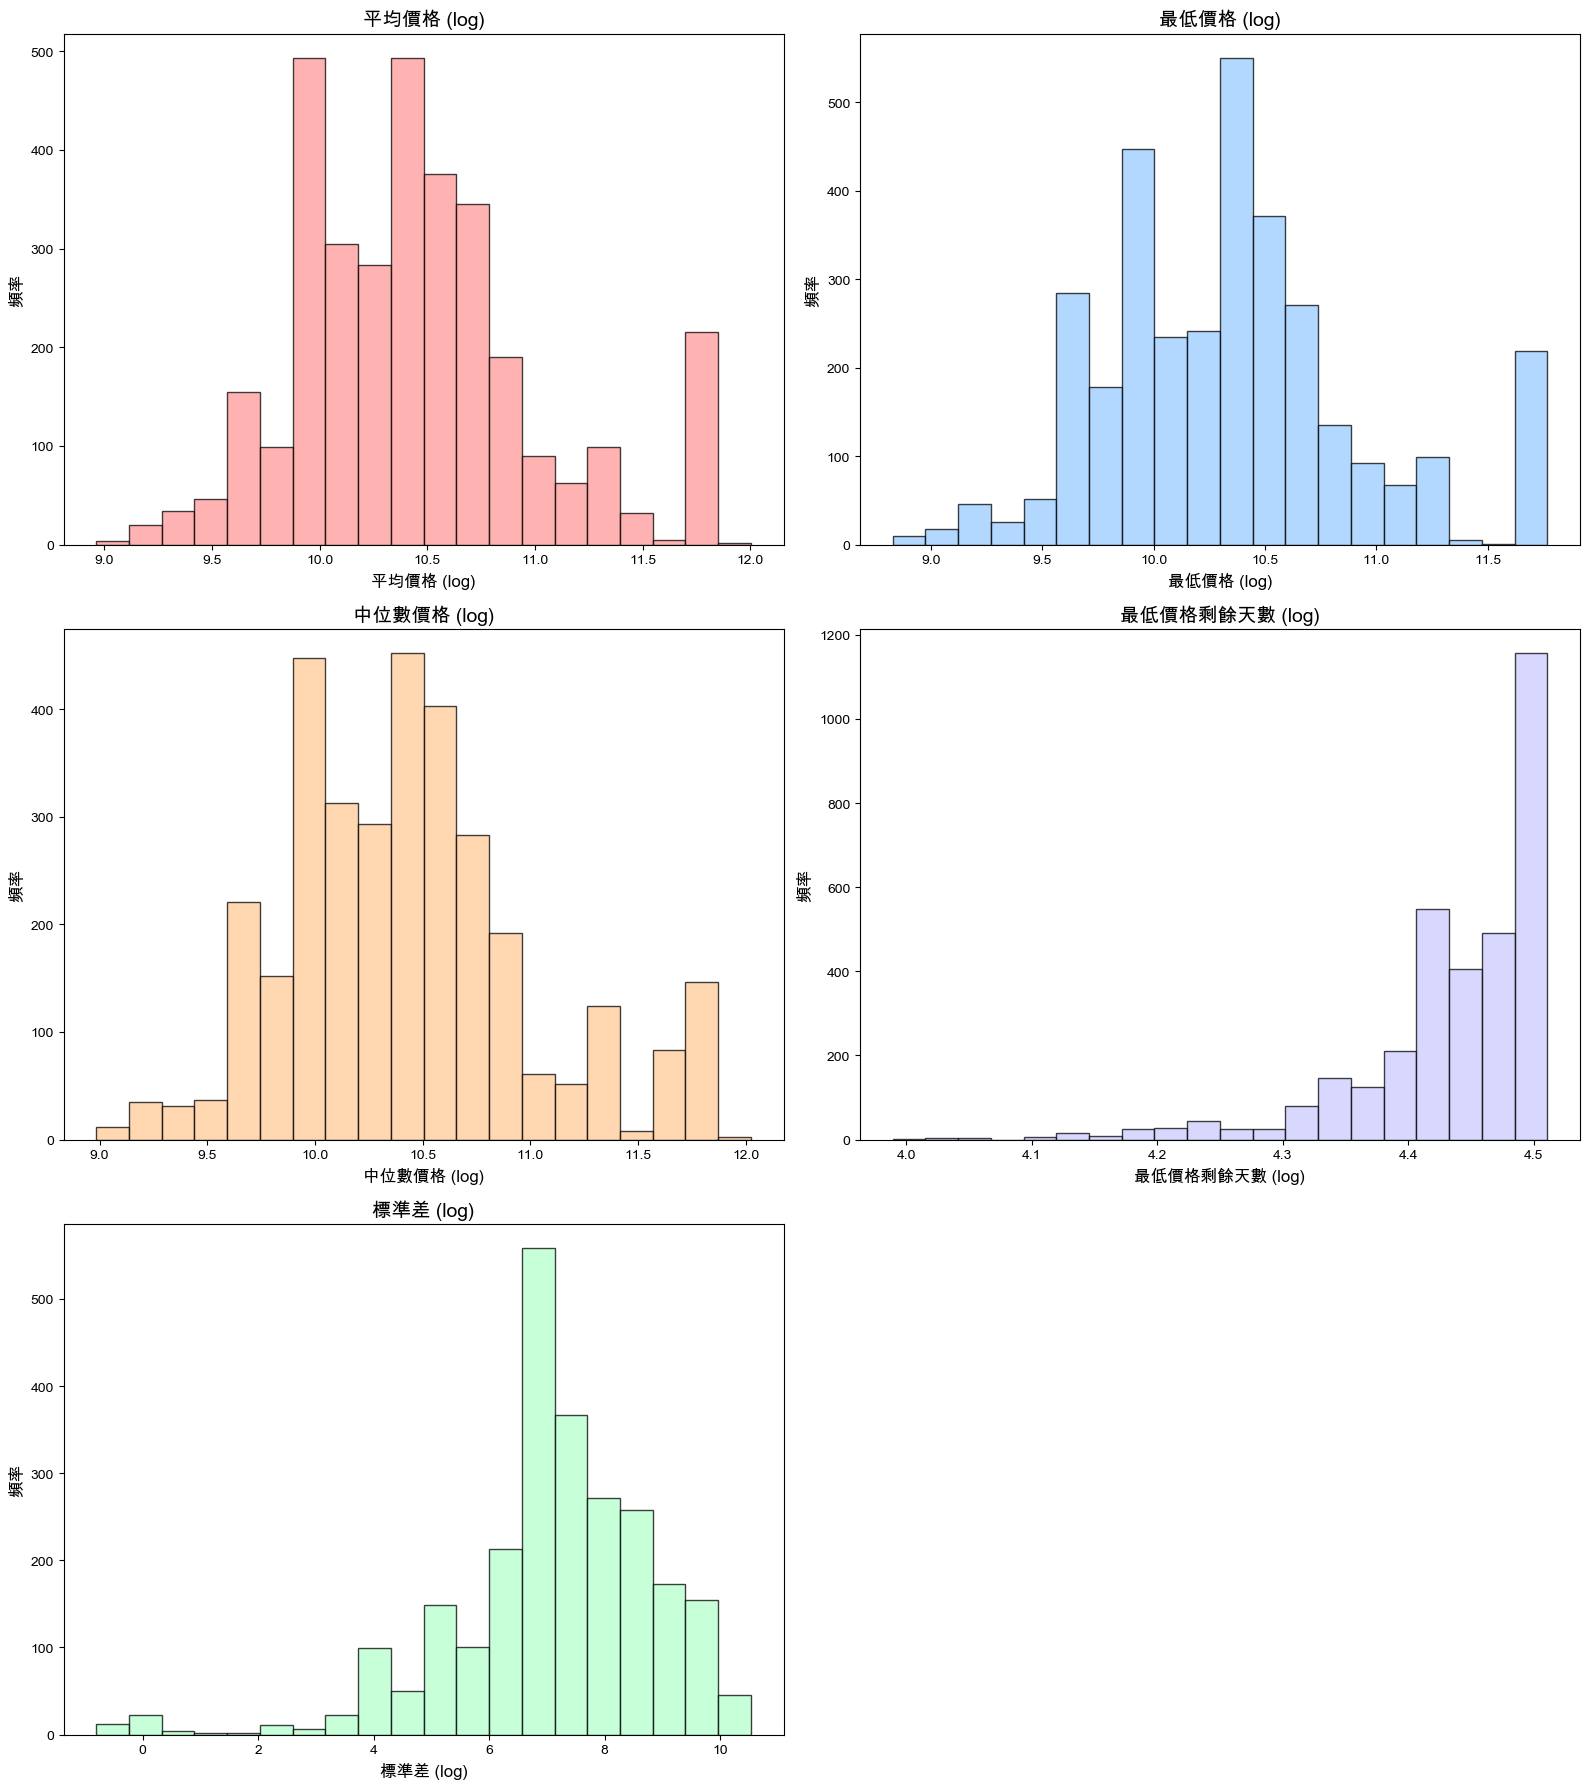

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 篩選條件：只保留艙等（主航段）= 經濟艙 的數據
df = df[df['艙等（主航段）'] == '經濟艙']

# 自定義顏色
custom_colors = ['#FF9999', '#99CCFF', '#FFCC99', '#CCCCFF', '#B3FFCC']

# 計算標準差
df['標準差'] = df.groupby(['出發日期', '航班代碼（主航段）', '航空公司（主航段）'])['平均價格'].transform('std')

# 對所有數據取對數
df['平均價格 (log)'] = np.log(df['平均價格'].replace(0, np.nan))
df['最低價格 (log)'] = np.log(df['最低價格'].replace(0, np.nan))
df['中位數價格 (log)'] = np.log(df['中位數價格'].replace(0, np.nan))
df['最低價格剩餘天數 (log)'] = np.log(df['最低價格剩餘天數'].replace(0, np.nan))
df['標準差 (log)'] = np.log(df['標準差'].replace(0, np.nan))

# 定義指標與標題
metrics = [
    '平均價格 (log)', 
    '最低價格 (log)', 
    '中位數價格 (log)', 
    '最低價格剩餘天數 (log)', 
    '標準差 (log)'
]
titles = ['平均價格 (log)', '最低價格 (log)', '中位數價格 (log)', '最低價格剩餘天數 (log)', '標準差 (log)']

# 繪製直方圖
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].hist(
        df[metric].dropna(),
        bins=20,  # 設定直方圖分箱數
        color=custom_colors[i % len(custom_colors)],
        alpha=0.75,
        edgecolor='black'
    )
    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel(metric, fontsize=12)
    axes[i].set_ylabel('頻率', fontsize=12)

# 移除多餘的子圖框
if len(metrics) < len(axes):
    for ax in axes[len(metrics):]:
        ax.axis('off')

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司的箱型圖**

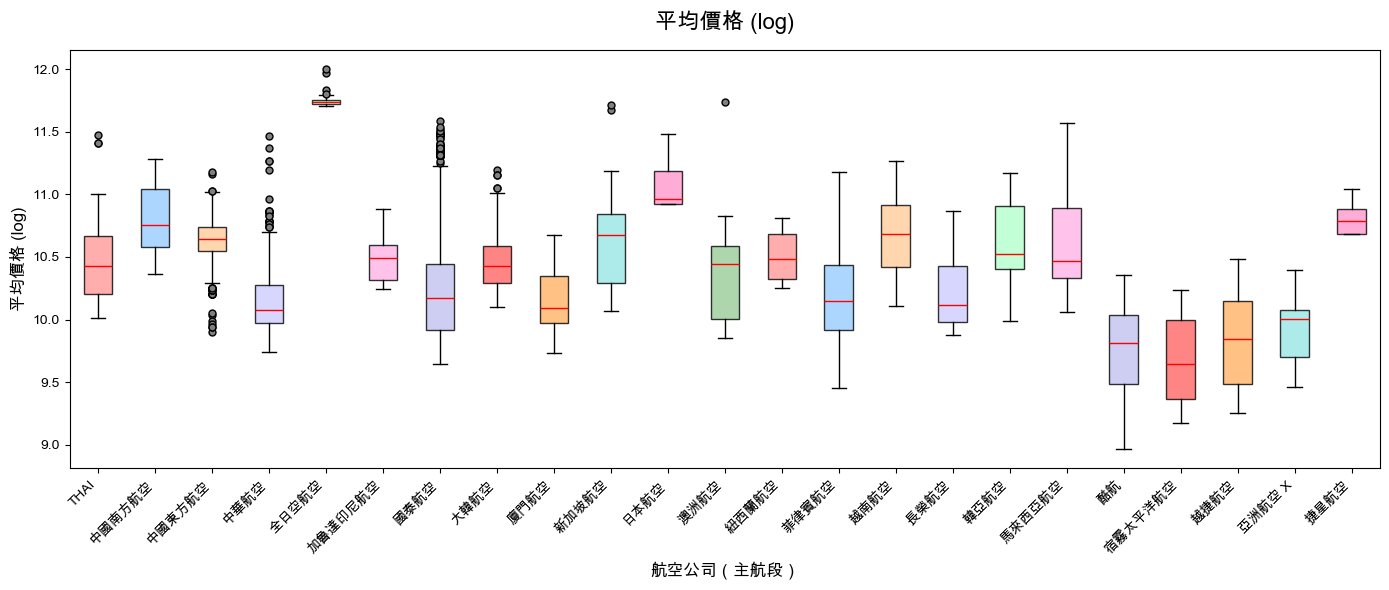

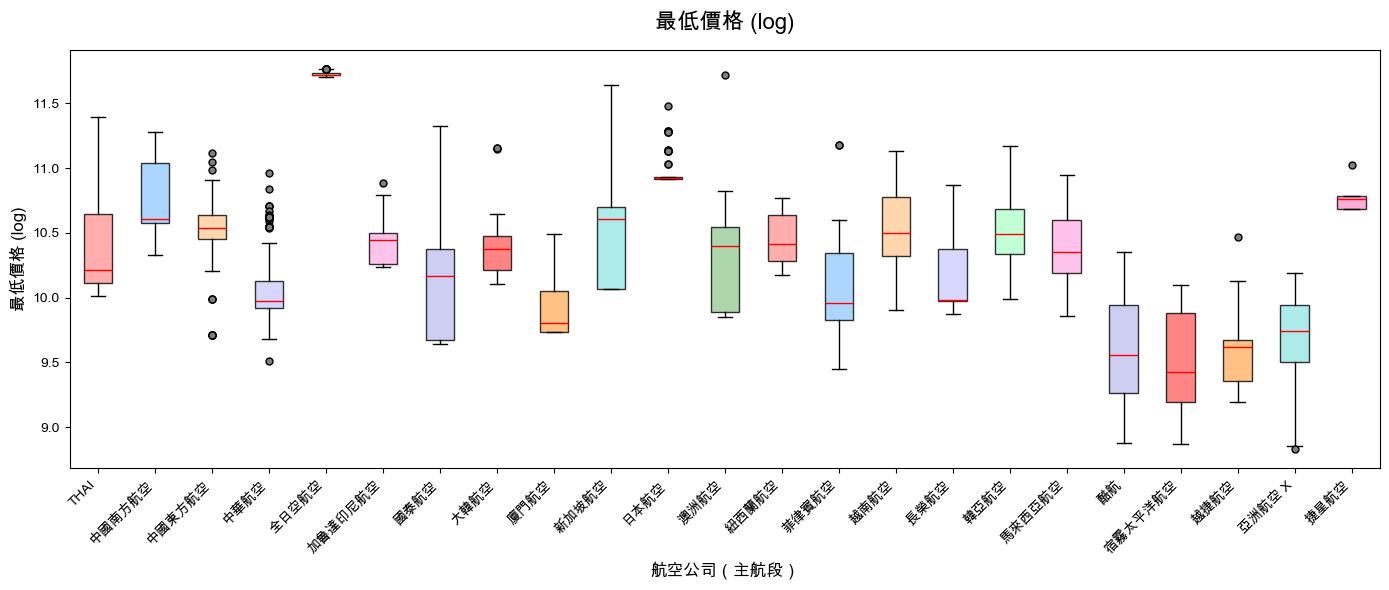

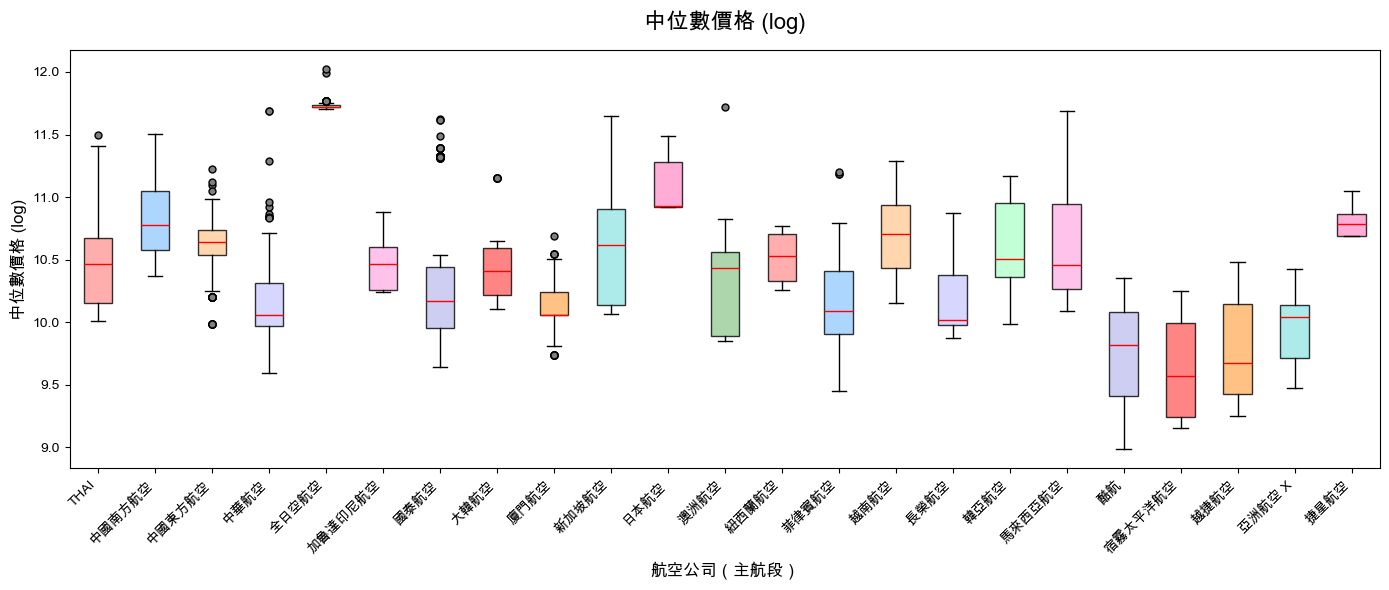

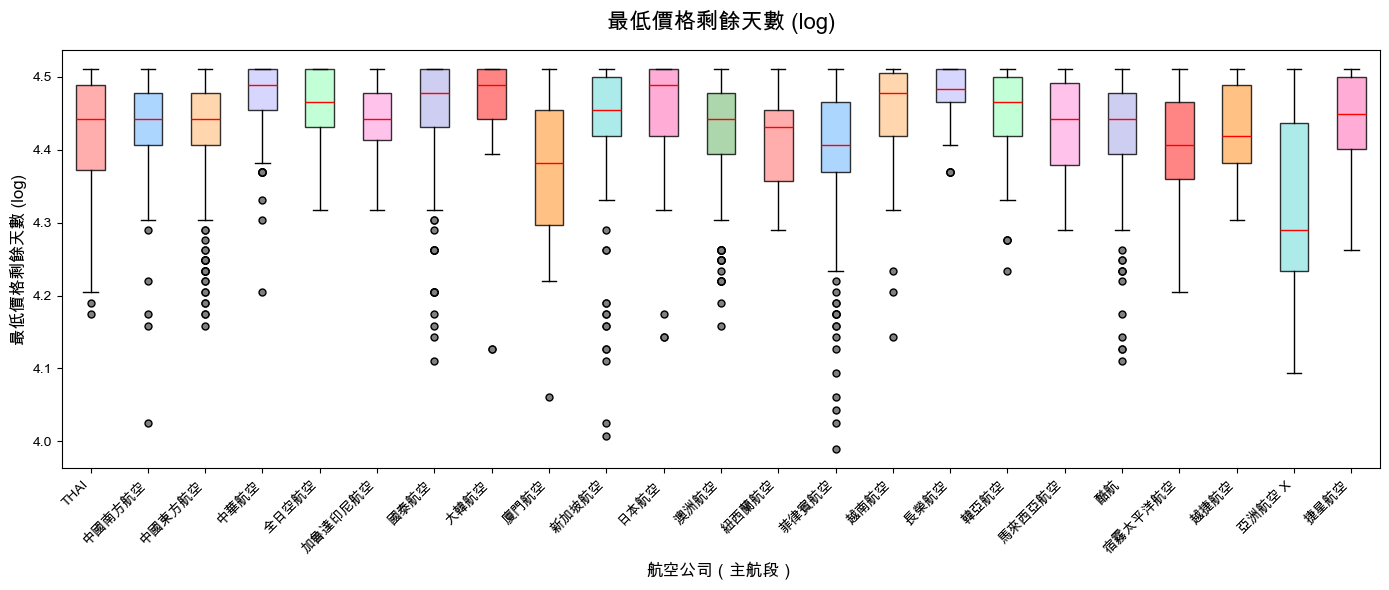

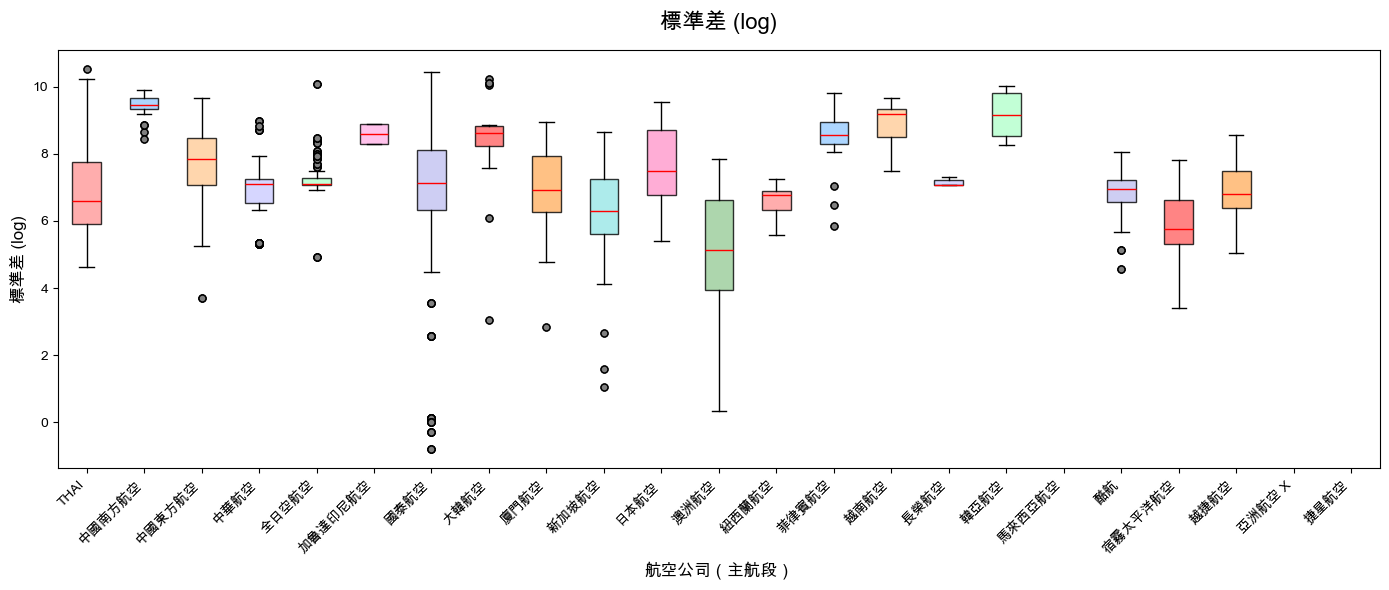

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 設定檔案路徑
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 篩選條件：只保留艙等（主航段）= 經濟艙 的數據
df = df[df['艙等（主航段）'] == '經濟艙']

# 定義顏色列表
custom_colors = [
    '#FF9999', '#99CCFF', '#FFCC99', '#CCCCFF', '#B3FFCC',
    '#FFB3E6', '#C2C2F0', '#FF6666', '#FFB266', '#99E6E6',
    '#FF99CC', '#99CC99'
]

# 定義廉價航空
low_cost_airlines = ['酷航', '宿霧太平洋航空', '越捷航空', '亞洲航空 X', '捷星航空']

# 排序航空公司，移除 NaN 並進行排序
airline_list = df['航空公司（主航段）'].dropna().unique()
sorted_airlines = sorted(
    [airline for airline in airline_list if airline not in low_cost_airlines]
)
sorted_airlines += low_cost_airlines

# 計算標準差
df['標準差'] = df.groupby(['出發日期', '航班代碼（主航段）', '航空公司（主航段）'])['平均價格'].transform('std')

# 對數轉換
df['平均價格 (log)'] = np.log(df['平均價格'].replace(0, np.nan))
df['最低價格 (log)'] = np.log(df['最低價格'].replace(0, np.nan))
df['中位數價格 (log)'] = np.log(df['中位數價格'].replace(0, np.nan))
df['最低價格剩餘天數 (log)'] = np.log(df['最低價格剩餘天數'].replace(0, np.nan))
df['標準差 (log)'] = np.log(df['標準差'].replace(0, np.nan))

# 定義要繪製的指標與標題
metrics = [
    '平均價格 (log)',
    '最低價格 (log)',
    '中位數價格 (log)',
    '最低價格剩餘天數 (log)',
    '標準差 (log)'
]
titles = [
    '平均價格 (log)',
    '最低價格 (log)',
    '中位數價格 (log)',
    '最低價格剩餘天數 (log)',
    '標準差 (log)'
]

# 繪製單行圖表
for i, metric in enumerate(metrics):
    plt.figure(figsize=(14, 6))  # 設定每個圖表的大小
    
    # 提取每個航空公司的資料
    data = [df[df['航空公司（主航段）'] == airline][metric].dropna() for airline in sorted_airlines]

    # 繪製箱型圖
    box = plt.boxplot(
        data,
        patch_artist=True,
        flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'gray'},
        medianprops={'color': 'red'}
    )

    # 為每個箱型上色
    for patch, color in zip(box['boxes'], custom_colors * (len(sorted_airlines) // len(custom_colors) + 1)):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)
        patch.set_edgecolor('black')

    # 設置標題與標籤
    plt.title(titles[i], fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('航空公司（主航段）', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(range(1, len(sorted_airlines) + 1), sorted_airlines, rotation=45, ha='right', fontsize=10)

    # 自動調整佈局
    plt.tight_layout()
    plt.show()

**不同航空公司平均價格跟最低價格的條形圖**

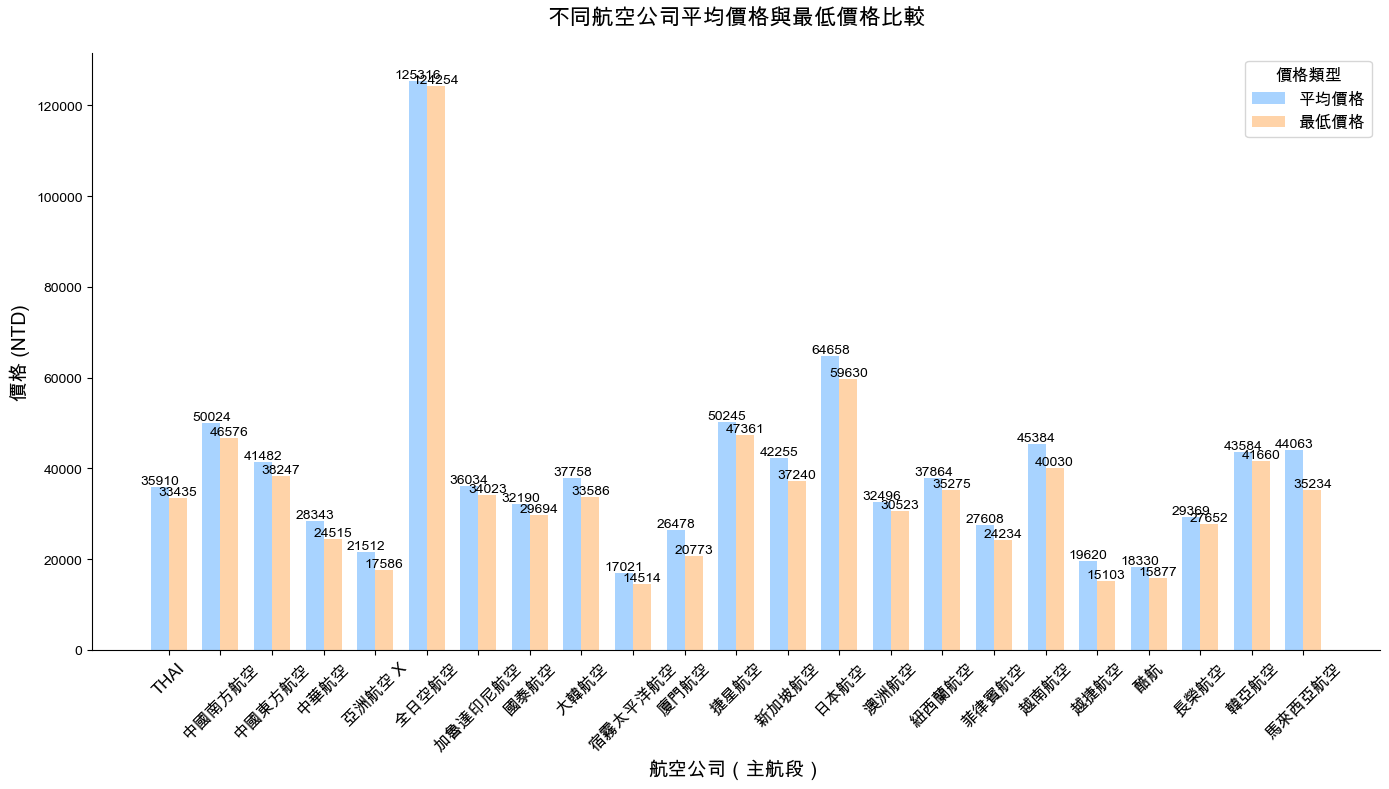

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 篩選條件：只保留艙等（主航段）= 經濟艙 的數據
df = df[df['艙等（主航段）'] == '經濟艙']

# 定義廉價航空
low_cost_airlines = ['酷航', '宿霧太平洋航空', '越捷航空', '亞洲航空 X', '捷星航空']

# 排序航空公司，移除 NaN 並進行排序
airline_list = df['航空公司（主航段）'].dropna().unique()
sorted_airlines = sorted(
    [airline for airline in airline_list if airline not in low_cost_airlines]
)
sorted_airlines += low_cost_airlines

# 聚合數據，保留每個航空公司的平均價格與最低價格
airline_stats = df.groupby('航空公司（主航段）', observed=True).agg(
    平均價格=('平均價格', 'mean'),
    最低價格=('最低價格', 'mean')
).reset_index()

# 條形圖位置
x = np.arange(len(airline_stats['航空公司（主航段）']))  # x 軸位置
bar_width = 0.35  # 條形寬度

# 繪製條形圖
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - bar_width / 2, airline_stats['平均價格'], bar_width, label='平均價格', color='#99CCFF', alpha=0.85)
bar2 = ax.bar(x + bar_width / 2, airline_stats['最低價格'], bar_width, label='最低價格', color='#FFCC99', alpha=0.85)

# 添加數值標籤
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10, color='black')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10, color='black')

# 設置標題與軸標籤
ax.set_title('不同航空公司平均價格與最低價格比較', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('航空公司（主航段）', fontsize=14)
ax.set_ylabel('價格 (NTD)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(airline_stats['航空公司（主航段）'], rotation=45, fontsize=12)

# 圖例
ax.legend(fontsize=12, loc='upper right', title='價格類型', title_fontsize=12)

# 美化邊框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司的價格標準差**

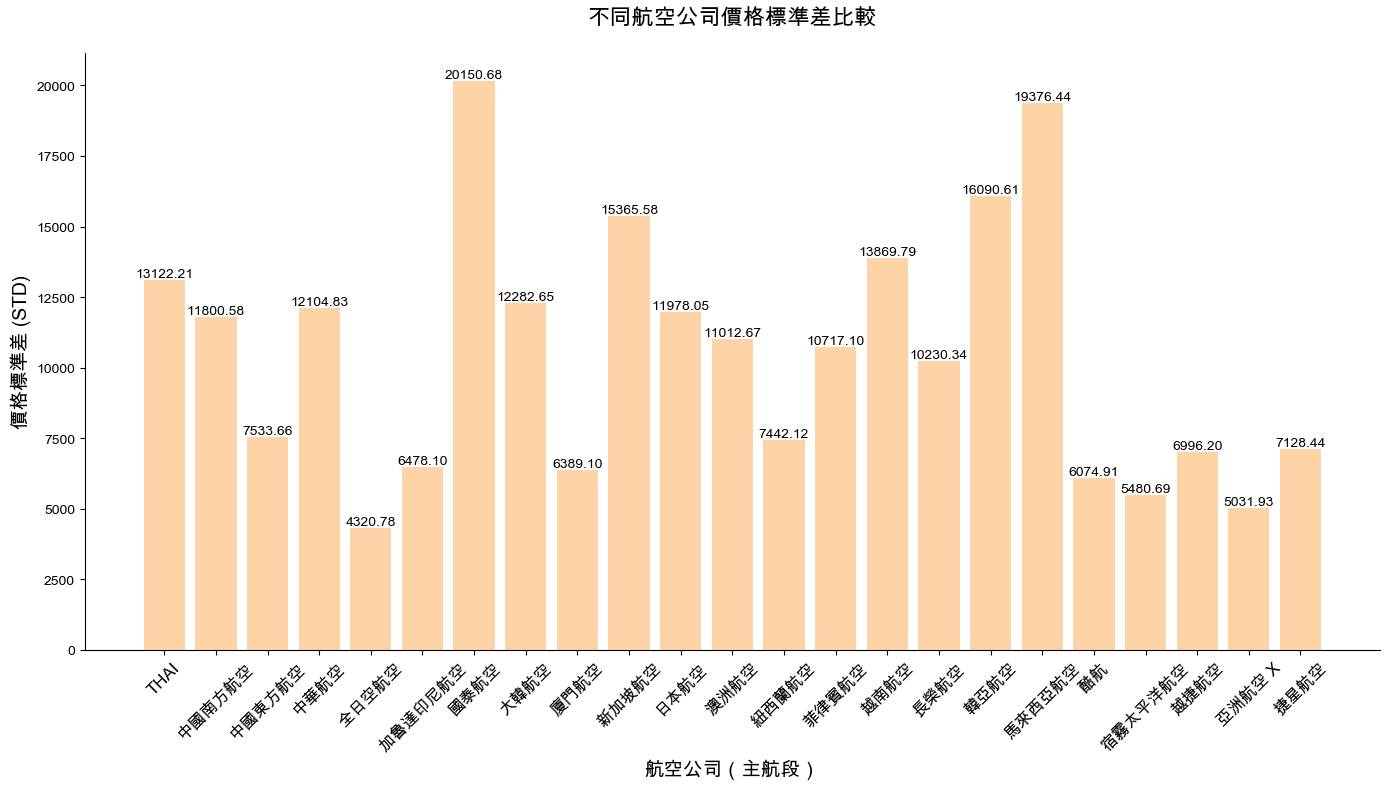

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 替換為支援中文的字體
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 篩選條件：只保留艙等（主航段）= 經濟艙 的數據
df = df[df['艙等（主航段）'] == '經濟艙']

# 計算每個航空公司的價格標準差
airline_stats = df.groupby('航空公司（主航段）').agg(
    標準差=('平均價格', 'std')
).reset_index()

# 定義廉價航空
low_cost_airlines = ['酷航', '宿霧太平洋航空', '越捷航空', '亞洲航空 X', '捷星航空']

# 排序航空公司，移除 NaN 並進行排序
airline_list = df['航空公司（主航段）'].dropna().unique()
sorted_airlines = sorted(
    [airline for airline in airline_list if airline not in low_cost_airlines]
)
sorted_airlines += low_cost_airlines

# 按排序重組數據
airline_stats = airline_stats.set_index('航空公司（主航段）').loc[sorted_airlines].reset_index()

# 繪製條形圖
plt.figure(figsize=(14, 8))
bars = plt.bar(airline_stats['航空公司（主航段）'], airline_stats['標準差'], color='#FFCC99', alpha=0.85)

# 添加數值標籤
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# 設置標題與軸標籤
plt.title('不同航空公司價格標準差比較', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('航空公司（主航段）', fontsize=14)
plt.ylabel('價格標準差 (STD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# 美化邊框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司最低價格剩餘天數的平均值**

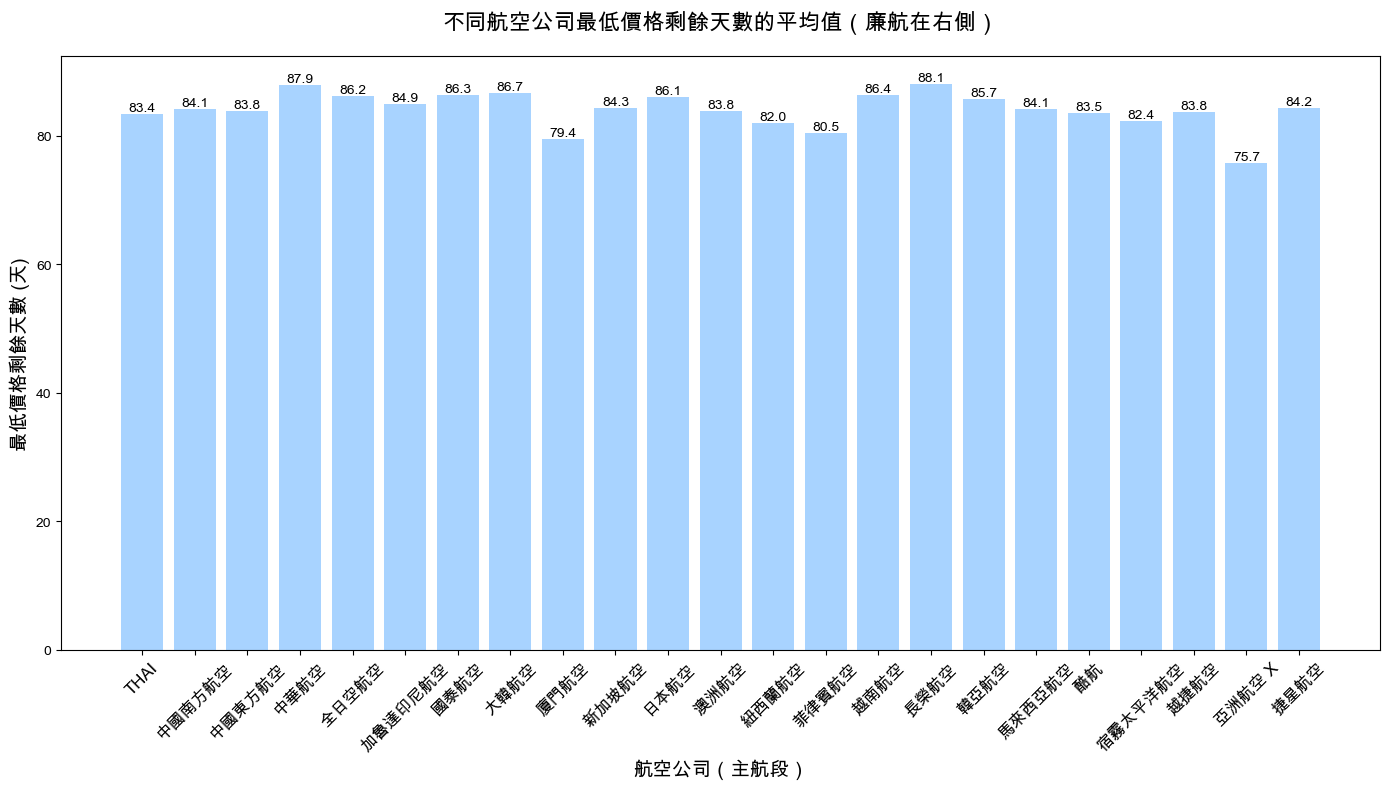

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv'
df = pd.read_csv(data_path)

# 篩選條件：只保留艙等（主航段）= 經濟艙 的數據
df = df[df['艙等（主航段）'] == '經濟艙']

# 定義廉價航空
low_cost_airlines = ['酷航', '宿霧太平洋航空', '越捷航空', '亞洲航空 X', '捷星航空']

# 排序航空公司，移除 NaN 並進行排序
airline_list = df['航空公司（主航段）'].dropna().unique()
sorted_airlines = sorted(
    [airline for airline in airline_list if airline not in low_cost_airlines]
)
sorted_airlines += low_cost_airlines

# 計算平均最低價格剩餘天數，並按照排序重新組織數據
average_days = df.groupby('航空公司（主航段）')['最低價格剩餘天數'].mean().reindex(sorted_airlines)

# 繪製條形圖
plt.figure(figsize=(14, 8))
bars = plt.bar(average_days.index, average_days.values, color='#99CCFF', alpha=0.85)

# 添加數值標籤
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

# 美化圖表
plt.title('不同航空公司最低價格剩餘天數的平均值（廉航在右側）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('航空公司（主航段）', fontsize=14)
plt.ylabel('最低價格剩餘天數 (天)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

**不同航空公司價格趨勢**

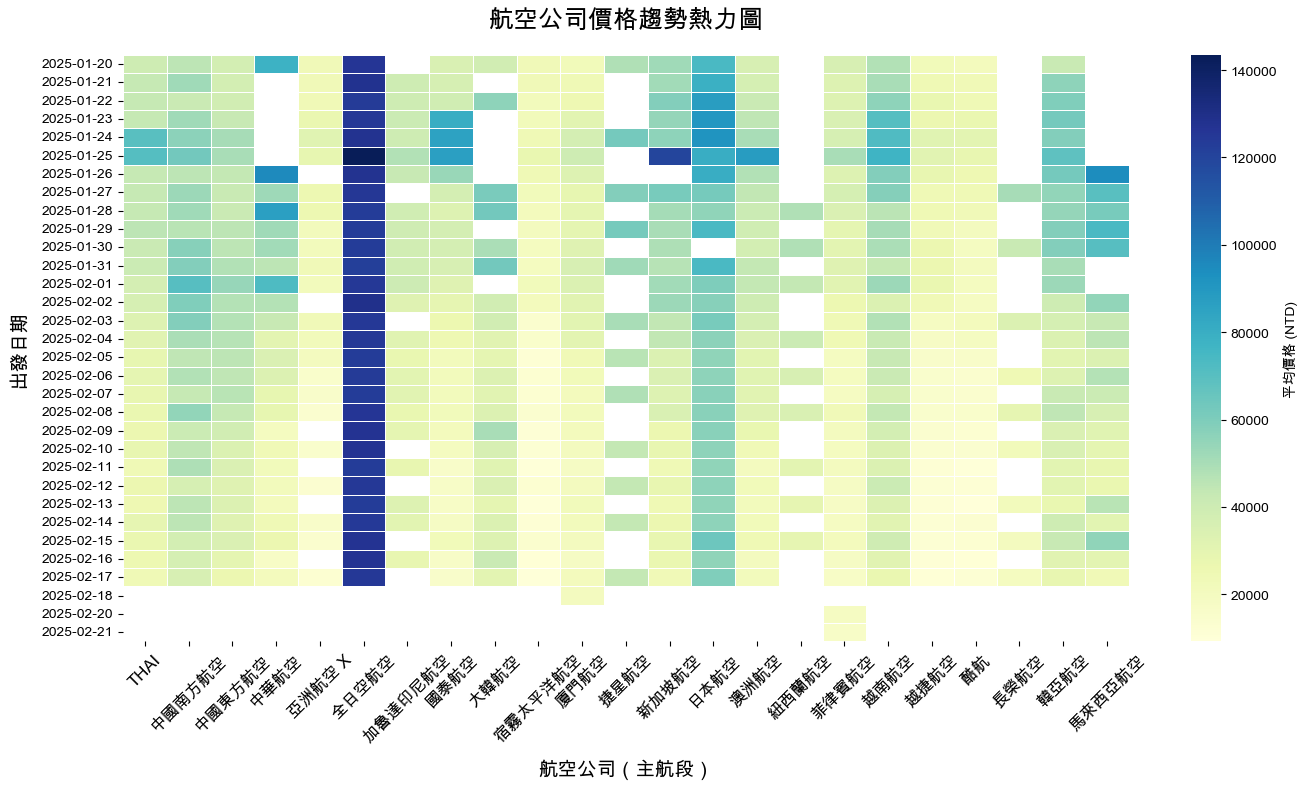

In [21]:
# 將數據轉為樞紐表
heatmap_data = df.pivot_table(index='出發日期', columns='航空公司（主航段）', values='平均價格', aggfunc='mean')

# 繪製熱力圖
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5, cbar_kws={'label': '平均價格 (NTD)'})

plt.title('航空公司價格趨勢熱力圖', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('航空公司（主航段）', fontsize=14, labelpad=10)
plt.ylabel('出發日期', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

**不同航空公司航班數量比例**

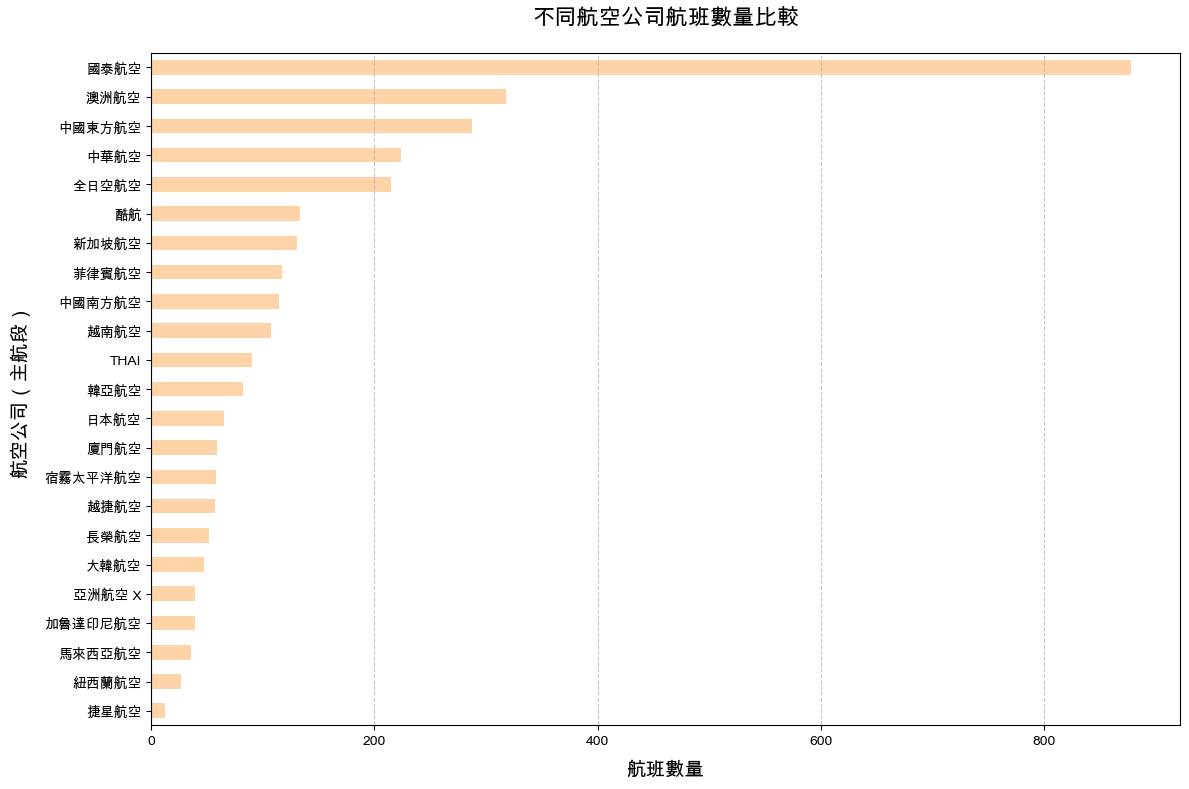

In [23]:
# 計算航班數量
flight_counts = df['航空公司（主航段）'].value_counts()

# 繪製條形圖
plt.figure(figsize=(12, 8))
flight_counts.sort_values().plot(kind='barh', color='#FFCC99', alpha=0.85)
plt.title('不同航空公司航班數量比較', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('航班數量', fontsize=14, labelpad=10)
plt.ylabel('航空公司（主航段）', fontsize=14, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()